<a href="https://colab.research.google.com/github/HRJ369/DH_307/blob/main/dh307_PT3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/HRJ369/DH_307/refs/heads/main/s10_sit%20(1).csv'
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(df.head())


    Time  pleth_1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  \
0  0.000    66165         NaN         NaN         NaN         NaN         NaN   
1  0.002    66160         NaN         NaN         NaN         NaN         NaN   
2  0.004    66149         NaN         NaN         NaN         NaN         NaN   
3  0.006    66153         NaN         NaN         NaN         NaN         NaN   
4  0.008    66153         NaN         NaN         NaN         NaN         NaN   

   Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  \
0         NaN         NaN         NaN          NaN          NaN          NaN   
1         NaN         NaN         NaN          NaN          NaN          NaN   
2         NaN         NaN         NaN          NaN          NaN          NaN   
3         NaN         NaN         NaN          NaN          NaN          NaN   
4         NaN         NaN         NaN          NaN          NaN          NaN   

   Unnamed: 13  Unnamed: 14  Unn

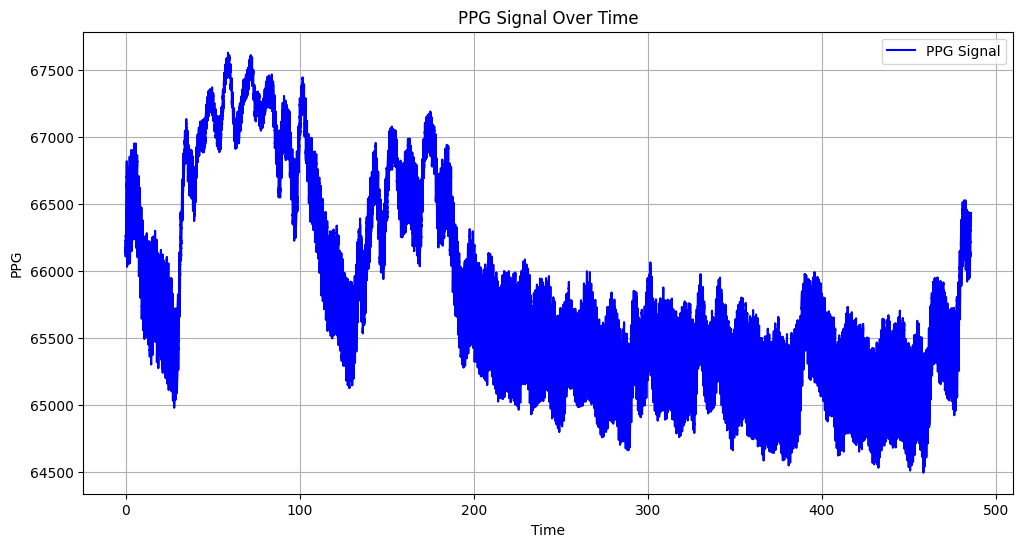

In [27]:
# Adjust these column names based on your dataset
time_column = 'Time'  # Replace with the actual name of the time column
ppg_column = 'pleth_1'    # Replace with the actual name of the PPG column

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(df[time_column], df[ppg_column], color='blue', label='PPG Signal')
plt.title('PPG Signal Over Time')
plt.xlabel('Time')
plt.ylabel('PPG')
plt.legend()
plt.grid()
plt.show()


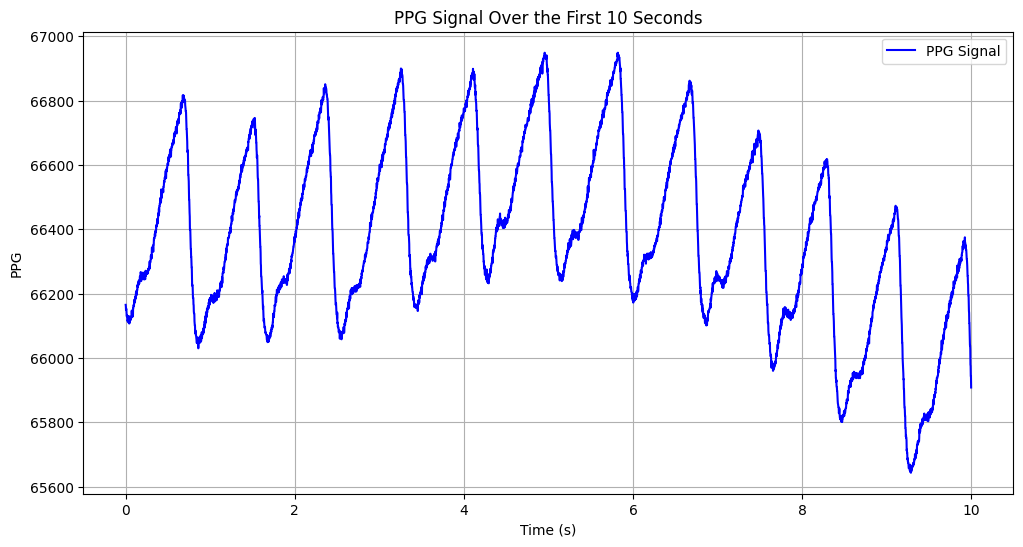

In [28]:
df_filtered = df[df[time_column] <= 10]
# Create a line plot for the first 10 seconds
plt.figure(figsize=(12, 6))
plt.plot(df_filtered[time_column], df_filtered[ppg_column], color='blue', label='PPG Signal')
plt.title('PPG Signal Over the First 10 Seconds')
plt.xlabel('Time (s)')
plt.ylabel('PPG')
plt.legend()
plt.grid()
plt.show()

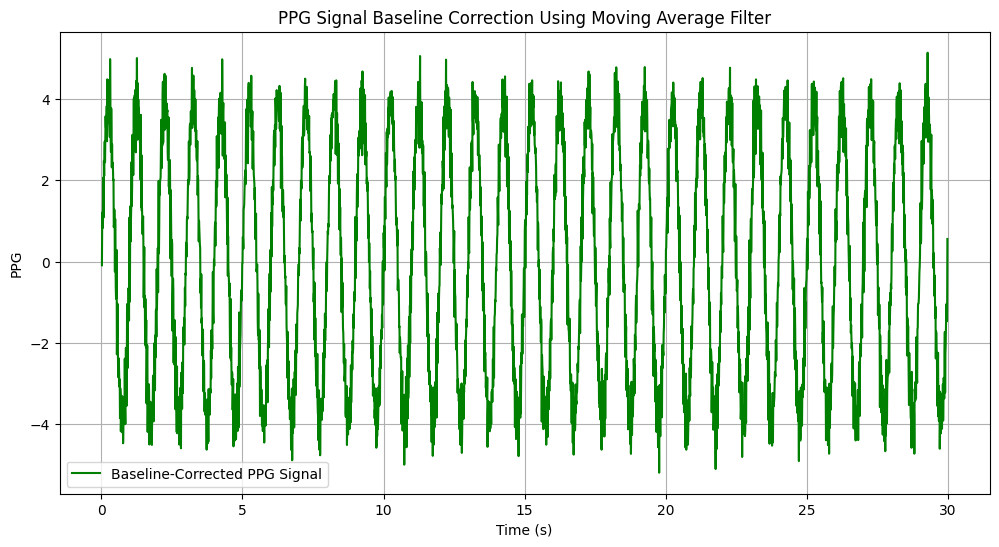

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate a sample signal (as you did earlier)
data = {
    'Time': np.linspace(0, 10*3, 1000*3),  # 1000 data points over 10 seconds
    'Signal': np.sin(np.linspace(0, 10*3, 1000*3) * 2 * np.pi) * 1000 + 66000 + 0.5 * np.random.randn(1000*3)  # Adding noise
}
df = pd.DataFrame(data)

# Moving Average Function
def moving_average(signal, smoothing_factor):
    return signal.rolling(window=smoothing_factor, center=True).mean()

# Apply the moving average filter
smoothing_factor = 5  # Adjust this value for more or less smoothing
df['Smoothed'] = moving_average(df['Signal'], smoothing_factor)

# Subtract the smoothed signal from the original to remove baseline drift
baseline_corrected_signal = df['Signal'] - df['Smoothed']

# Plot the original, smoothed, and baseline-corrected signals
plt.figure(figsize=(12, 6))
#plt.plot(df['Time'], df['Signal'], label='Original PPG Signal', color='blue', alpha=0.5)
#plt.plot(df['Time'], df['Smoothed'], label='Smoothed Signal (Baseline)', color='orange')
plt.plot(df['Time'], baseline_corrected_signal, label='Baseline-Corrected PPG Signal', color='green')
plt.xlabel('Time (s)')
plt.ylabel('PPG')
plt.title('PPG Signal Baseline Correction Using Moving Average Filter')
plt.legend()
plt.grid()
plt.show()



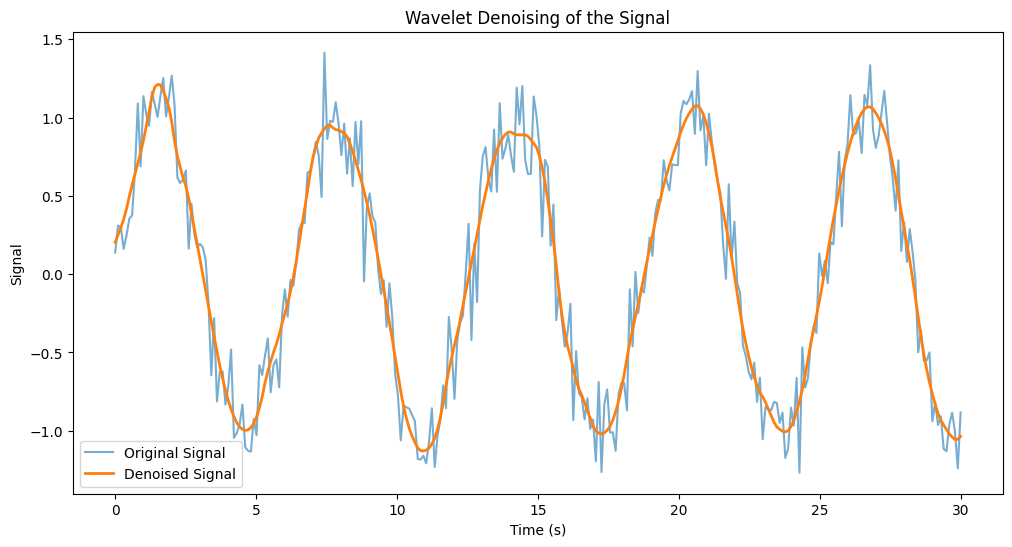

In [55]:
import pandas as pd
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Example: Create a sample DataFrame
# Assuming the DataFrame has a 'Time' column (in seconds) and a 'Signal' column (your data)
data = {
    'Time': np.linspace(0, 10*3, 100*3),  # Simulating 100 data points over 10 seconds
    'Signal': np.sin(np.linspace(0, 10*3, 100*3)) + 0.2*np.random.randn(100*3)  # Adding noise
}
df = pd.DataFrame(data)

# Perform wavelet transform for denoising
wavelet = 'db4'  # Daubechies wavelet
level = 3  # Level of decomposition

# Decompose the signal
coeffs = pywt.wavedec(df['Signal'], wavelet, level=level)

# Apply thresholding to the detail coefficients
threshold = np.sqrt(2 * np.log(len(df['Signal'])))
coeffs[1:] = [pywt.threshold(c, value=threshold, mode='soft') for c in coeffs[1:]]

# Reconstruct the denoised signal
denoised_signal = pywt.waverec(coeffs, wavelet)

# Add the denoised signal to the DataFrame
df['Denoised_Signal'] = denoised_signal[:len(df)]

# Plot the original and denoised signals
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['Signal'], label='Original Signal', alpha=0.6)
plt.plot(df['Time'], df['Denoised_Signal'], label='Denoised Signal', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.legend()
plt.title('Wavelet Denoising of the Signal')
plt.show()



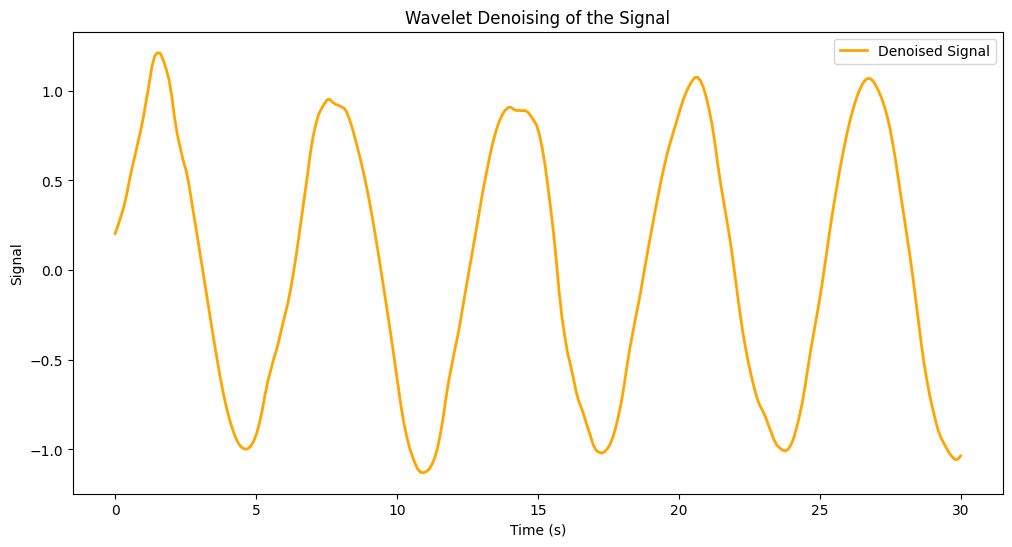

In [57]:
# Plot the original and denoised signals
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['Denoised_Signal'], label='Denoised Signal', linewidth=2, color ='orange')
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.legend()
plt.title('Wavelet Denoising of the Signal')
plt.show()


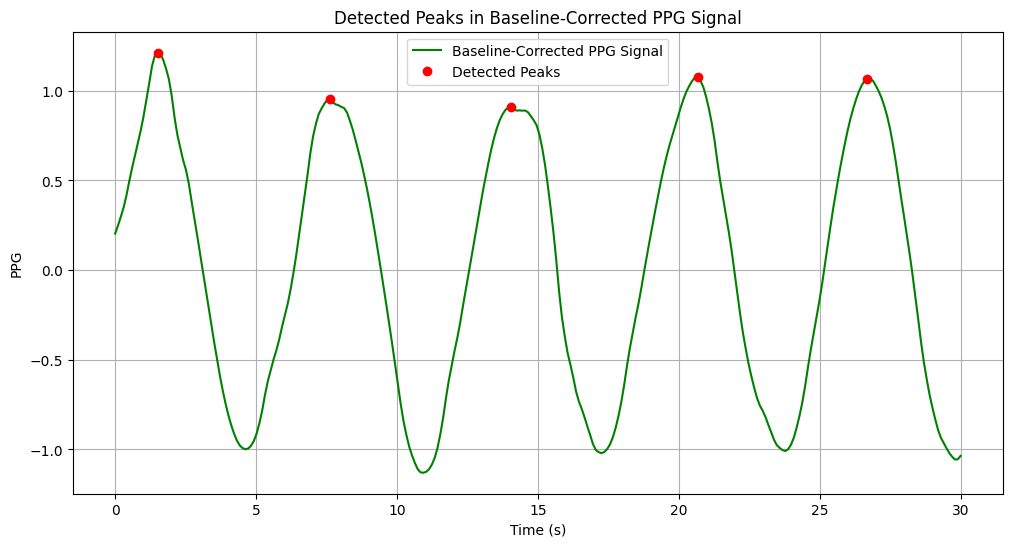

Number of detected peaks: 5


In [60]:
def detect_peaks(signal, min_distance=50, min_height=0):
    """
    Detect peaks in a signal based on basic criteria.

    Parameters:
        signal (list or array): The PPG signal values.
        min_distance (int): Minimum number of data points between peaks.
        min_height (float): Minimum height required to consider a point as a peak.

    Returns:
        list: Indices of detected peaks in the signal.
    """
    peaks = []
    signal_length = len(signal)

    for i in range(1, signal_length - 1):
        # Check if the current point is higher than the previous and next points
        if signal[i] > signal[i - 1] and signal[i] > signal[i + 1]:
            # Check if the peak is above the minimum height
            if signal[i] >= min_height:
                # Ensure the peak is sufficiently distant from the last detected peak
                if len(peaks) == 0 or (i - peaks[-1]) >= min_distance:
                    peaks.append(i)

    return peaks

# Example usage
baseline_corrected_signal = df['Denoised_Signal'].values  # Assuming 'PPG' column contains the baseline-corrected signal
peaks = detect_peaks(baseline_corrected_signal, min_distance=50, min_height=0)

# Plotting the signal with detected peaks
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], baseline_corrected_signal, label='Baseline-Corrected PPG Signal', color='green')
plt.plot(df['Time'].iloc[peaks], baseline_corrected_signal[peaks], 'ro', label='Detected Peaks')  # Mark detected peaks
plt.xlabel('Time (s)')
plt.ylabel('PPG')
plt.title('Detected Peaks in Baseline-Corrected PPG Signal')
plt.legend()
plt.grid()
plt.show()

# Display number of detected peaks
print(f"Number of detected peaks: {len(peaks)}")


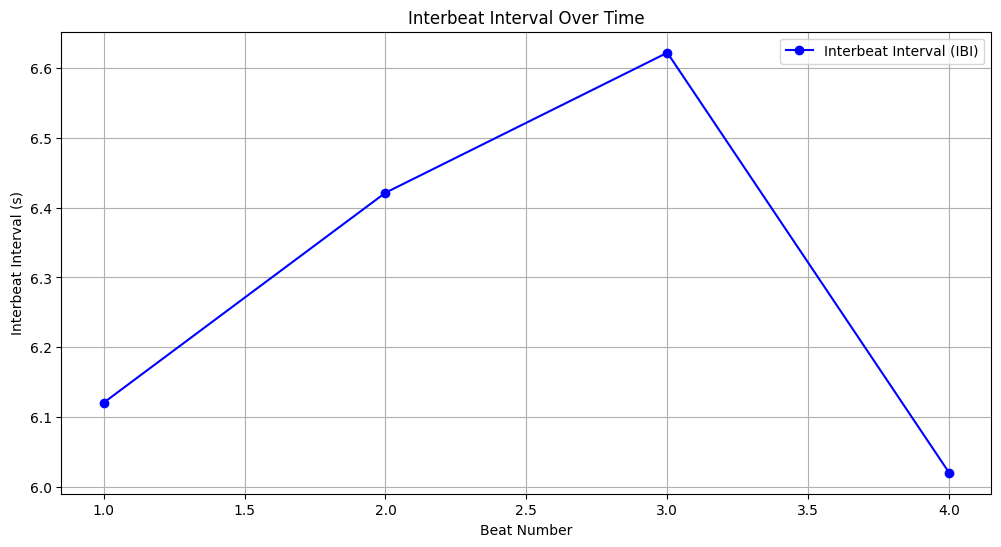

Average Interbeat Interval: 6.30 seconds
Estimated Heart Rate: 9.53 bpm


In [61]:
def calculate_ibi(time, peak_indices):
    """
    Calculate the interbeat intervals (IBI) from the detected peak indices.

    Parameters:
        time (list or array): The time values corresponding to the PPG signal.
        peak_indices (list): Indices of the detected peaks in the PPG signal.

    Returns:
        list: Interbeat intervals in seconds.
    """
    ibi = []

    for i in range(1, len(peak_indices)):
        # Calculate the time difference between consecutive peaks
        interval = time[peak_indices[i]] - time[peak_indices[i - 1]]
        ibi.append(interval)

    return ibi

# Assuming 'Time' column contains the time values and 'PPG' column contains the baseline-corrected signal
time_values = df['Time'].values
ibi = calculate_ibi(time_values, peaks)

# Plotting the IBI
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(ibi) + 1), ibi, 'bo-', label='Interbeat Interval (IBI)')
plt.xlabel('Beat Number')
plt.ylabel('Interbeat Interval (s)')
plt.title('Interbeat Interval Over Time')
plt.legend()
plt.grid()
plt.show()

# Display the average IBI and heart rate
average_ibi = sum(ibi) / len(ibi)
heart_rate = 60 / average_ibi  # Heart rate in beats per minute (bpm)
print(f"Average Interbeat Interval: {average_ibi:.2f} seconds")
print(f"Estimated Heart Rate: {heart_rate:.2f} bpm")
